In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score, confusion_matrix, classification_report, auc, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.shape

(920, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [6]:
df.duplicated().sum()

np.int64(0)

# **Handling missing values**

In [7]:
df.drop(columns=['dataset'], inplace=True)
df.drop(columns=['id'], inplace=True)
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [8]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    float64
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 88.2+ KB


In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


# **Change Categorical datatype by using LabelEncoder**

In [12]:
cols_to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Apply LabelEncoder on each selected column
le = LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [13]:
df['num'].unique()

array([0, 2, 1, 3, 4])

# **EDA**

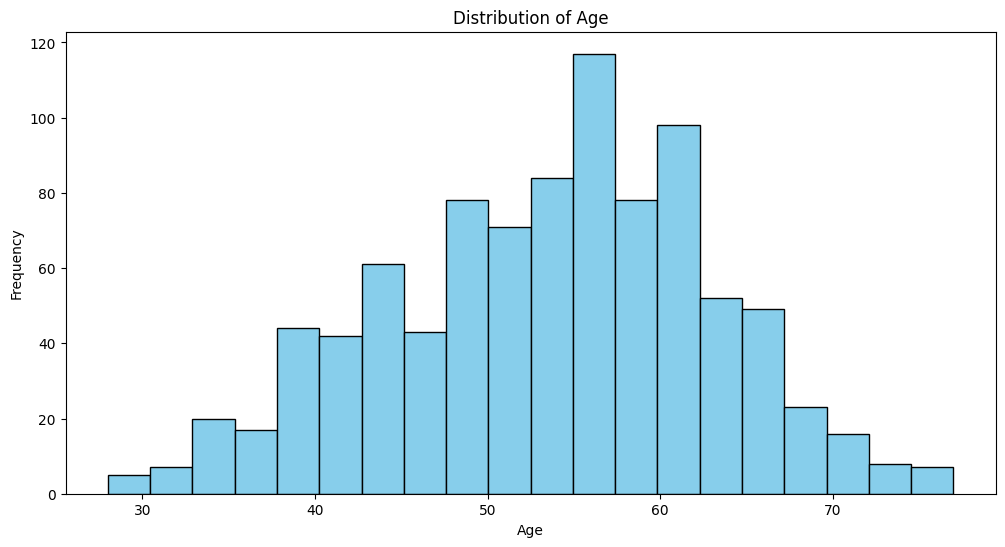

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

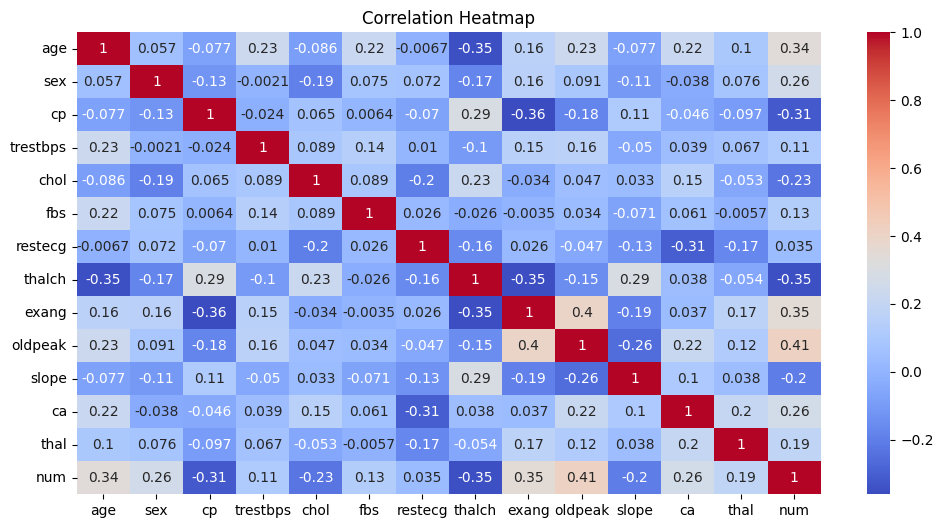

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

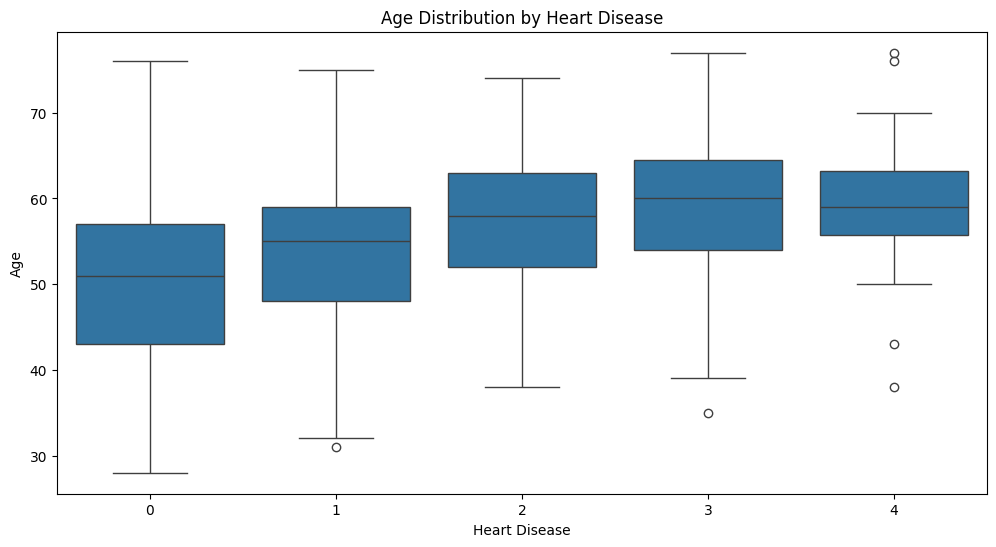

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='num', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

In [17]:
from sklearn.decomposition import PCA

# **Separate and Split data**

In [18]:
X = df.drop(columns=['num'])
y = df['num'].values
y_binary = np.where(y == 0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# **Scale Features(StanderScaler)**

In [19]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Apply PCA**

In [20]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

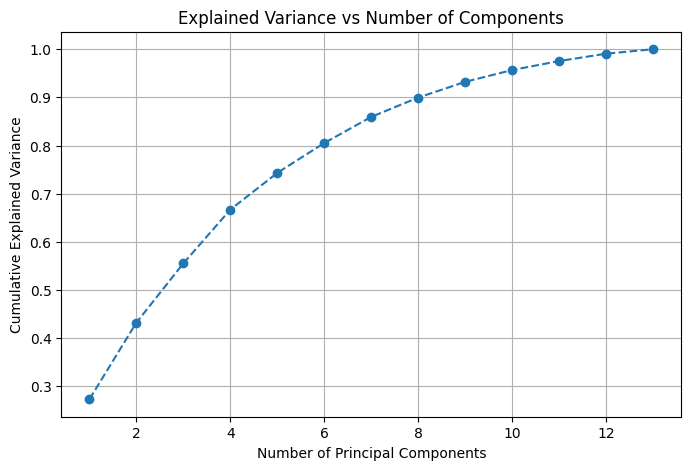

In [22]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()

In [23]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 10


In [24]:
pca_opt = PCA(n_components=n_components)
X_train_pca_opt = pca_opt.fit_transform(X_train_scaled)
X_test_pca_opt = pca_opt.transform(X_test_scaled)

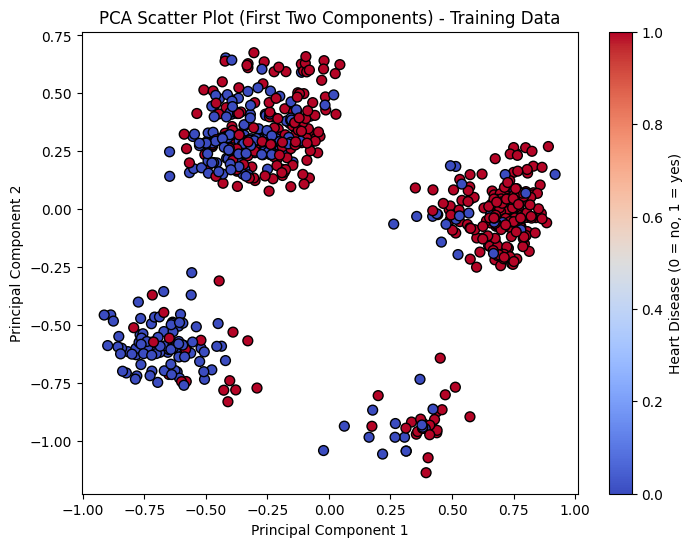

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_opt[:, 0], X_train_pca_opt[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (First Two Components) - Training Data')
plt.colorbar(label='Heart Disease (0 = no, 1 = yes)')
plt.show()

# **Feature Selection**

In [26]:
# Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y_binary)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

import xgboost as xgb
# XGBoost Feature Importance
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X, y_binary)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

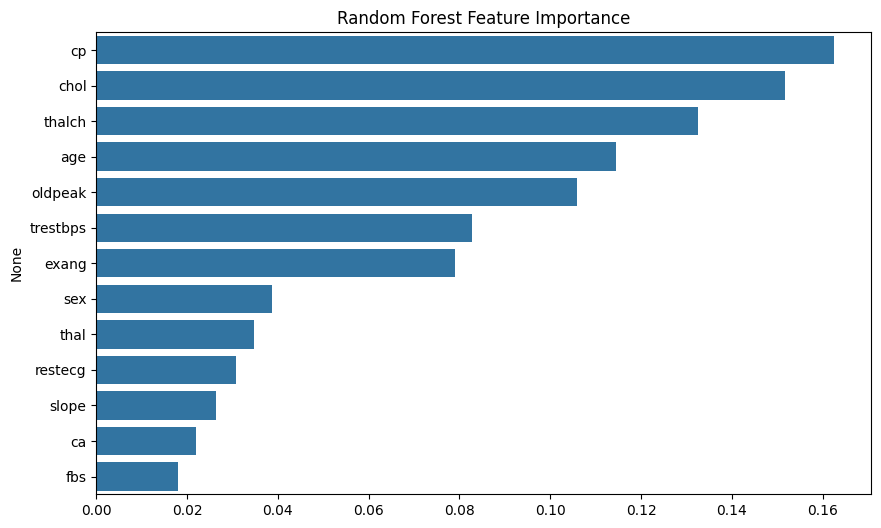

In [27]:
# Plot feature importance for Random Forest
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title("Random Forest Feature Importance")
plt.show()

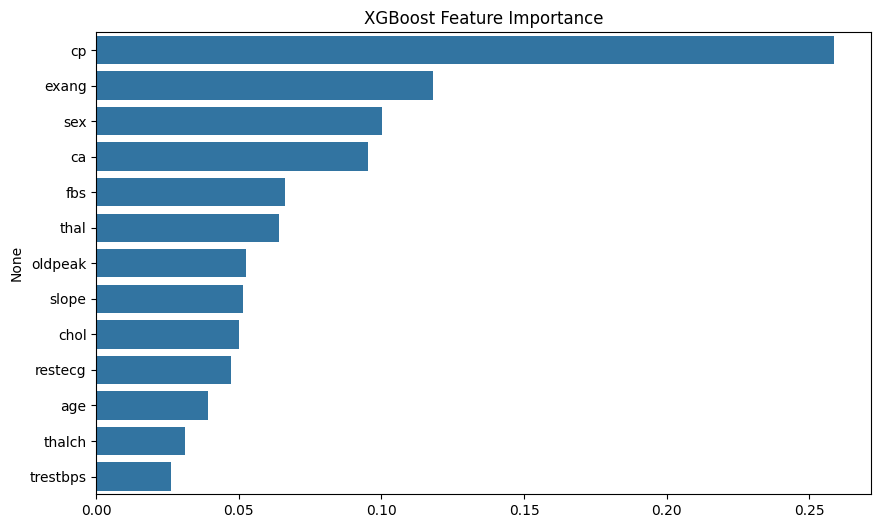

In [28]:
# Plot feature importance for XGBoost
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title("XGBoost Feature Importance")
plt.show()

In [29]:
from sklearn.feature_selection import RFE

# usig it with LogisticRegression
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y_binary)

selected_features_rfe = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features_rfe.tolist())

Selected features by RFE: ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']



Selected features by Chi-Square Test:
['age', 'sex', 'cp', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'slope', 'ca']



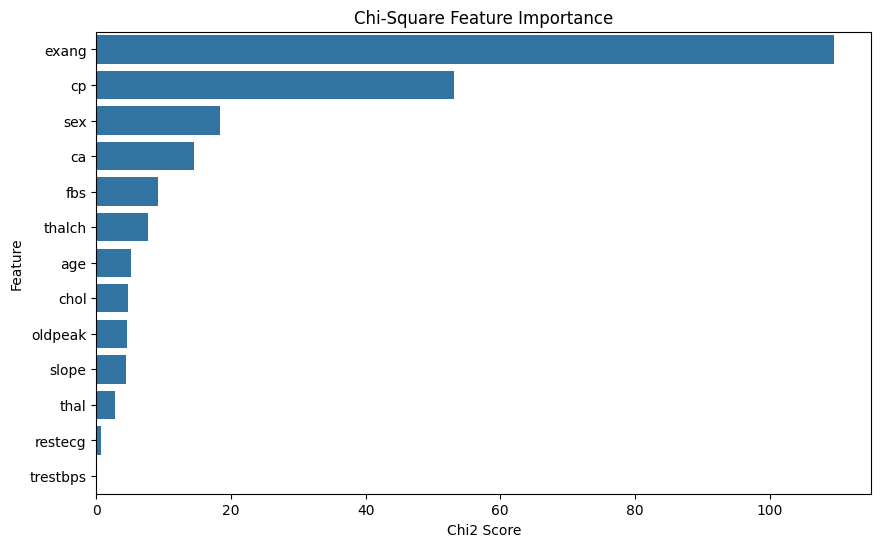

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

# Ensure all values are positive
scaler_for_chi2 = MinMaxScaler()
X_pos = scaler_for_chi2.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_pos, y_binary)

selected_features_chi2 = X.columns[chi2_selector.get_support()]
chi2_scores = chi2_selector.scores_

chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores
}).sort_values(by='Chi2 Score', ascending=False)

print("\nSelected features by Chi-Square Test:")
print(selected_features_chi2.tolist())
print()

plt.figure(figsize=(10,6))
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_results)
plt.title("Chi-Square Feature Importance")
plt.show()

# **Supervised Models(Classification Models)**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.83      0.84      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        82
           1       0.77      0.80      0.79       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        82
           1       0.82      0.87      0.85       102

    accuracy                           0.83       184
   macro

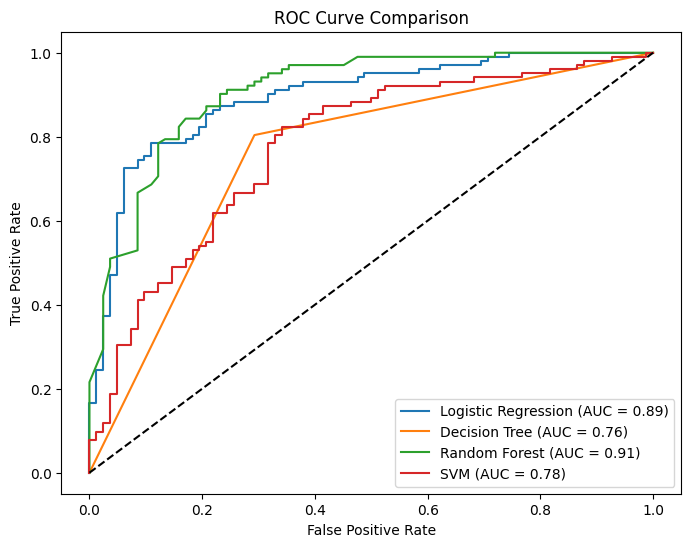

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}
results = []
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For ROC

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
print()

#Results Table
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Summary:")
print(results_df)
print()

#ROC Curves
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# **Unsupervised Models(K-means clustering)**

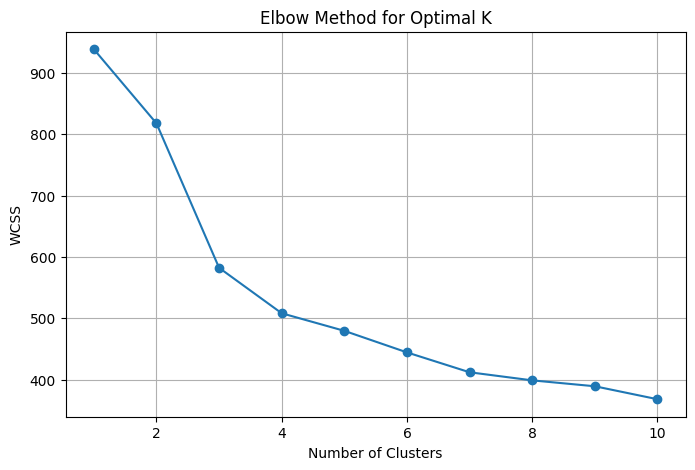

In [32]:
#K-Means Clustering (Elbow Method)
X_scaled = MinMaxScaler().fit_transform(X)  # Scale data for clustering

wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [33]:
#Choose K from elbow visually (e.g., 2 for disease/no disease)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

#Compare with actual labels
print("\nK-Means Confusion Matrix vs Actual Labels:")
print(confusion_matrix(y_binary, clusters_kmeans))


K-Means Confusion Matrix vs Actual Labels:
[[367  44]
 [415  94]]


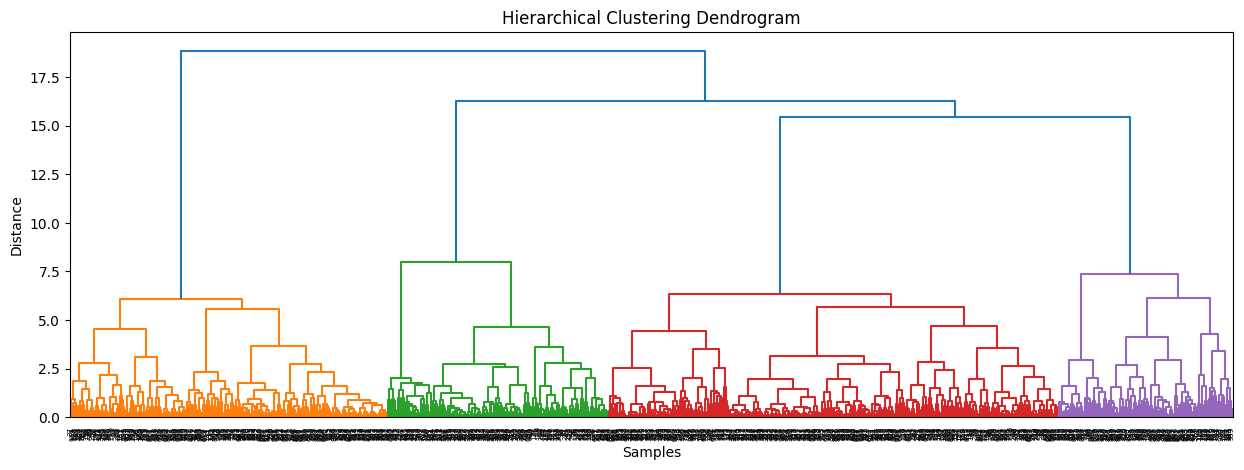

In [34]:
#Hierarchical Clustering (Dendrogram)
plt.figure(figsize=(15, 5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [35]:
# Fit hierarchical clustering (updated for new sklearn)
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters_hier = hierarchical.fit_predict(X_scaled)

print("\nHierarchical Clustering Confusion Matrix vs Actual Labels:")
print(confusion_matrix(y_binary, clusters_hier))



Hierarchical Clustering Confusion Matrix vs Actual Labels:
[[377  34]
 [292 217]]


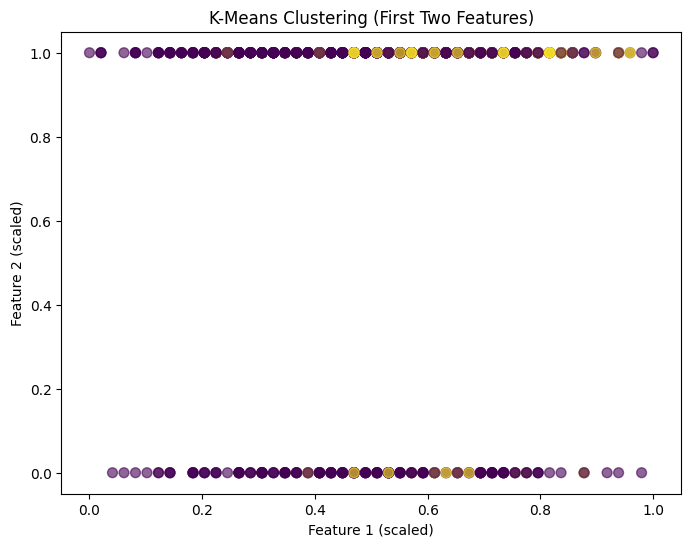

In [36]:
#Visualization of KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, cmap='viridis', s=50, alpha=0.6)
plt.title("K-Means Clustering (First Two Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# **Hyperparameter Tuning**

In [37]:
baseline_results = {}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    baseline_results[name] = accuracy_score(y_test, y_pred)

print("\nBaseline Model Accuracies:")
for name, acc in baseline_results.items():
    print(f"{name}: {acc:.4f}")

#Hyperparameter Tuning
optimized_results = {}
best_models = {}


Baseline Model Accuracies:
Logistic Regression: 0.8207
Decision Tree: 0.7609
Random Forest: 0.8261
SVM: 0.7446


In [38]:
# Logistic Regression (GridSearchCV)
lr_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"]
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                       param_grid=lr_params, scoring='accuracy', cv=5, n_jobs=-1)
lr_grid.fit(X_train, y_train)
best_models["Logistic Regression"] = lr_grid.best_estimator_
optimized_results["Logistic Regression"] = accuracy_score(y_test, lr_grid.predict(X_test))

In [39]:
# Decision Tree (RandomizedSearchCV)
dt_params = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 15],
    "criterion": ["gini", "entropy"]
}
dt_rand = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                             param_distributions=dt_params, scoring='accuracy', cv=5,
                             n_iter=10, random_state=42, n_jobs=-1)
dt_rand.fit(X_train, y_train)
best_models["Decision Tree"] = dt_rand.best_estimator_
optimized_results["Decision Tree"] = accuracy_score(y_test, dt_rand.predict(X_test))

In [40]:
# Random Forest (RandomizedSearchCV)
rf_params = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
rf_rand = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                             param_distributions=rf_params, scoring='accuracy', cv=5,
                             n_iter=10, random_state=42, n_jobs=-1)
rf_rand.fit(X_train, y_train)
best_models["Random Forest"] = rf_rand.best_estimator_
optimized_results["Random Forest"] = accuracy_score(y_test, rf_rand.predict(X_test))

In [42]:
# SVM (GridSearchCV)
svm_params = {
    "C": [0.1, 1],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale"]
}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42),
                        param_grid=svm_params, scoring='accuracy', cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_models["SVM"] = svm_grid.best_estimator_
optimized_results["SVM"] = accuracy_score(y_test, svm_grid.predict(X_test))

In [43]:
#Compare Results:
print("\nOptimized Model Accuracies:")
for name, acc in optimized_results.items():
    print(f"{name}: {acc:.4f}")


Optimized Model Accuracies:
Logistic Regression: 0.8261
Decision Tree: 0.7554
Random Forest: 0.8152
SVM: 0.8370


In [44]:
#Summary Table:
comparison_df = pd.DataFrame({
    "Model": list(baseline_results.keys()),
    "Baseline Accuracy": list(baseline_results.values()),
    "Optimized Accuracy": [optimized_results[m] for m in baseline_results.keys()]
})
comparison_df["Improvement"] = comparison_df["Optimized Accuracy"] - comparison_df["Baseline Accuracy"]

print("\nPerformance Comparison:")
print(comparison_df.sort_values(by="Optimized Accuracy", ascending=False))


Performance Comparison:
                 Model  Baseline Accuracy  Optimized Accuracy  Improvement
3                  SVM           0.744565            0.836957     0.092391
0  Logistic Regression           0.820652            0.826087     0.005435
2        Random Forest           0.826087            0.815217    -0.010870
1        Decision Tree           0.760870            0.755435    -0.005435


In [45]:
#Best Model:
best_model_name = comparison_df.sort_values(by="Optimized Accuracy", ascending=False).iloc[0]["Model"]
print(f"\nBest Performing Model: {best_model_name}")
print(best_models[best_model_name])


Best Performing Model: SVM
SVC(C=1, kernel='linear', probability=True, random_state=42)


In [46]:
import joblib
joblib.dump(best_models["SVM"], "best_svm_model.pkl")
svm_loaded = joblib.load("best_svm_model.pkl")

In [48]:
from sklearn.pipeline import Pipeline

final_pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classifier", best_models["SVM"])
])

# Fit the pipeline on the full dataset
final_pipeline.fit(X, y_binary)

# Save pipeline as .pkl
joblib.dump(final_pipeline, "heart_disease_svm_pipeline.pkl")
print("Model pipeline saved as heart_disease_svm_pipeline.pkl")

Model pipeline saved as heart_disease_svm_pipeline.pkl


In [52]:
import sklearn, pandas
print("scikit-learn:", sklearn.__version__)
print("pandas:", pandas.__version__)

scikit-learn: 1.6.1
pandas: 2.2.2
